<h3>Exercise 1.1</h3>

Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

<hr style="border-top: 1px solid;" />

An overview of number of ways of selecting four cups from eight.

In [34]:
# The number of ways of selecting four things from eight
# Where the order doesn't matter.
x1 = (8 * 7 * 6 * 5)/(4 * 3 * 2 *1)

# 8 cups:           0 1 x 3 4 5 6 7
# 4 cups:                2  _  _  _
# Possiblities:         8* 

# 8 cups:           0 1 x 3 x 5 6 7
# 4 cups:                2 4   _  _
# Possiblities:         8* 7* 

# 8 cups:           0 1 x 3 x 5 6 x
# 4 cups:                2 4  7  _
# Possiblities:         8* 7* 6*

# 8 cups:           x 1 x 3 x 5 6 x
# 4 cups:                2 4  7  0
# Possiblities:         8* 7* 6* 5*

# 8 cups:           0 1 2 3 4 5 6 7
# 4 cups:               _ _ _ _
# Possiblities:         8* 7* 6* 5*
# Permutations:         2 4 7 0 (Selection 1)
#                       4 2 7 0 (Selection 1)
#                       4*3*2*1*

print("The number of ways of selecting four cups from eight. Where the order doesn't matter is: " + str(x1))

# The probability of randomly selecting the four correct cups.
y1 = 1.0/70.0

print("\nProbability of randomly selecting correct four cups from eight is: " + str(y1))

The number of ways of selecting four things from eight. Where the order doesn't matter is: 70.0

Probability of randomly selecting correct 4 cups from 8 is: 0.014285714285714285


The above gives about a 1.5% chance of randomly selecting the correct cups. To ensure the probability of randomly selecting the correct cups is less than or equal to 1%. We are going to adapt code from https://stackoverflow.com/a/4941932 and a use the funtion math.comb(). 

<h3>What is math.comb()</h3>

This function will return the number of ways to select r elements from n items without repetition and order.

Reference: 

https://python.plainenglish.io/python-3-math-module-an-incredible-module-b224bf421c6e

Lets try repeat by selecting four cups from eight to see if we get the same probability of randomly selecting the four correct cups.

In [40]:
# math module
import math

# Number of ways of selecting 4 cups from 8
x2 = math.comb(8,4)

# Probability of randomly selecting correct 4 cups from 8 is:
y2 = 1.0/math.comb(8,4)

print("The number of ways of selecting four cups from eight. Where the order doesn't matter is: " + str(x))

print("\nProbability of randomly selecting correct four cups from eight is: " + str(y2))

# Verify the results  
x3 = (x1 == x2)

print("\nVerify both methods output are True or False for the number of ways: " + str(x3))

y3 = (y1 == y2)
print("\nVerify both methods output are True or False for the probability:  " + str(y3))


The number of ways of selecting four things from eight. Where the order doesn't matter is: 70

Probability of randomly selecting correct 4 cups from 8 is: 0.014285714285714285

Verify both methods output is True or False for the number of ways: True

Verify both methods output is True or False for the probability:  True


To ensure the probability of randomly selecting the correct cups is less than or equal to 1%. If we increase the experitment with 10 cups, five with milk in first and five with tea in first, then the chances of selecting correctly is much less than 1%


In [42]:
# Number of ways of selecting 5 cups from 10
x4 = math.comb(10,5)

# Probability of randomly selecting correct 5 cups is:
y4 = 1.0/math.comb(10,5)

print("The number of ways of selecting five cups from ten. Where the order doesn't matter is: " + str(x4))

print("\nProbability of randomly selecting correct five cups from ten is: " + str(y4))

The number of ways of selecting five cups from ten. Where the order doesn't matter is: 252

Probability of randomly selecting correct five cups from ten is: 0.003968253968253968


The chances of selecting correctly with 10 cups, five with milk in first and five with tea in first is 0.4%

To illustrate the concept further, the experiment is now going to have 9 cups in total, 4 with milk in first and 5 with tea in first. The probability for this would also work in reverse to allow 5 with milk in first and 4 with tea in first.

In [44]:
# Number of ways of selecting 4 cups from 9
x5 = math.comb(9,4)

# Number of ways of selecting 5 cups from 9
x6 = math.comb(9,5)

# Verify the results  
x7 = (x5 == x6)

# Probability of randomly selecting correct 4 cups from 9 is:
y5 = 1.0/math.comb(9,4)

print("The number of ways of selecting four cups from nine. Where the order doesn't matter is: " + str(x5))

print("\nThe number of ways of selecting five cups from nine. Where the order doesn't matter is: " + str(x6))

print("\nVerify both outputs are True or False for the number of ways: " + str(x7))

print("\nProbability of randomly selecting correct four or five cups from ten is: " + str(y5))



The number of ways of selecting four cups from nine. Where the order doesn't matter is: 126

The number of ways of selecting five cups from nine. Where the order doesn't matter is: 126

Verify both outputs are True or False for the number of ways: True

Probability of randomly selecting correct four or five cups from ten is: 0.007936507936507936


<h3>Bonus</h3>

Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

In [75]:
# Number of ways of selecting 3 cups from 10
x8 = math.comb(10,3)

# Probability of randomly selecting correct 3 cups from 10 is:
y6 = 1.0/math.comb(10,3)

print("The number of ways of selecting three cups from ten. Where the order doesn't matter is: " + str(x8))

print("\nAnswer: Number of ways of selecting three cups from ten is equal to : " + str(y6))



The number of ways of selecting three cups from ten. Where the order doesn't matter is: 120

Answer: Number of ways of selecting three cups from ten is equal to : 0.008333333333333333


<h3>Exercise 1.3</h3>

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" >scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.


Lets review the terms:

**Null hypothesis (often denoted H0)** This hypothesis is assumed to be true until there is evidence to suggest otherwise. [https://online.stat.psu.edu/stat500/lesson/6a/6a.1]

**Alternative hypothesis is often denoted as Ha or H1** is an opposing theory to the null hypothesis. [https://www.indeed.com/career-advice/career-development/alternative-hypothesis]

**What Is P-Value?** In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct [https://www.investopedia.com/terms/p/p-value.asp]

**What Is Significance level?** The significance level, also known as alpha or α, is a measure of the strength of the evidence that must be present in your sample before you will reject the null hypothesis and conclude that the effect is statistically significant. [https://statisticsbyjim.com/glossary/significance-level/] Significance level defines how much evidence we require to reject Null hypothesis (H0) in favor of Alternative hypothesis (HA). It serves as the cutoff. The default cutoff commonly used is 0.05. If the p-value is less than 0.05, we reject H0. If the p-value is greater than 0.05, we do not reject H0. [https://www.statisticsteacher.org/2017/01/05/why-0-05-two-examples-that-put-students-in-the-role-of-decision-maker/]

<h3>Lady Tasting Tea</h3>

**Note** The null hypothesis is that the subject has no ability to distinguish the teas. In Fisher's approach, there was no alternative hypothesis [https://en.wikipedia.org/wiki/Lady_tasting_tea]

**Null hypothesis (often denoted H0)** the subject cannot tell if the cup had milk in it first or last.

**Alternative hypothesis is often denoted as Ha or H1** the subject can tell.

The p-value of randomly selecting correct 4 cups from 8 is: **0.014285714285714285**. Should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing.

Therefore Fisher considered that unlikely enough to reject the null hypothesis if they manage it. [https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/01-statistics.ipynb]

To explain we will have to determine the possible contingency tables and calculate the p-value which is the probability of observing this or an even more extreme contingency table under the null hypothesis. [https://towardsdatascience.com/fishers-exact-test-from-scratch-with-python-2b907f29e593]


In [12]:
# The following is adapted from https://towardsdatascience.com/fishers-exact-test-from-scratch-with-python-2b907f29e593
import numpy as np
import pandas as pd

ar=np.array([[4, 0],[0, 4]])    
df=pd.DataFrame(ar, columns=["Milk", "Tea"])
df.index=["Milk", "Tea"] 
df 

df2=df.copy()
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2



,Milk,Tea,Row_Total
Milk,4,0,4
Tea,0,4,4
Column_Total,4,4,8


4 Milk Guessed correctly we get the following probability: 

![Fisher_Tea_P02](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/Practicals/Fisher_Tea_P02.PNG?raw=true)

This would also be true in reverse 4 Tea guessed correctly

![Fisher_Tea_P04](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/Practicals/Fisher_Tea_P04.PNG?raw=true)

In [13]:
ar=np.array([[3, 1],[1, 3]])    
df=pd.DataFrame(ar, columns=["Milk", "Tea"])
df.index=["Milk", "Tea"] 
df 

df2=df.copy()
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,Milk,Tea,Row_Total
Milk,3,1,4
Tea,1,3,4
Column_Total,4,4,8


3 Milk guessed correctly we get the following probability: 

![Fisher_Tea_P01](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/Practicals/Fisher_Tea_P01.PNG?raw=true)

This would also be true in reverse 3 Tea guessed correctly

![Fisher_Tea_P05](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/Practicals/Fisher_Tea_P05.PNG?raw=true)

In [14]:
ar=np.array([[2, 2],[2, 2]])    
df=pd.DataFrame(ar, columns=["Milk", "Tea"])
df.index=["Milk", "Tea"] 
df 

df2=df.copy()
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,Milk,Tea,Row_Total
Milk,2,2,4
Tea,2,2,4
Column_Total,4,4,8


2 Milk Guessed correctly we get the following probability: 

![Fisher_Tea_P02](https://raw.githubusercontent.com/DPR-droid/2022_09_Machine_Learning_and_Statistics/main/Practicals/Fisher_Tea_P03.PNG?raw=true)

To represent these we can adapted from [scipy.stats.fisher_exact](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact) to output the p-value by selecting the parameter of **alternative='greater'**

In [86]:
import scipy.stats as stats
from scipy.stats import hypergeom
import numpy as np

table = np.array([[4, 0],[0, 4]])

# The one-sided p-value for alternative='greater' is the probability that a random table has x >= a

oddsratio, pvalue = stats.fisher_exact(table, alternative='greater')  
y7 = pvalue


print("\nProbability of randomly selecting correct four cups from eight is: " + str(y7))


Probability of randomly selecting correct four cups from eight is: 0.014285714285714268


<h3>Distribution</h3>

As discussed in the lecture we can also see the outcomes using plots

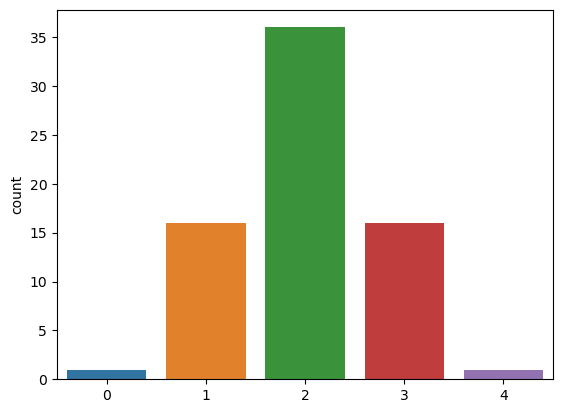

In [88]:
import random
import seaborn as sns
import itertools

# The eight cups.
cups = list(range(8))

poss = list(itertools.combinations(cups, 4))

# Pick a random correct answer from the list of 70 to simulate the experiment.
milkfirst = set(random.choice(poss))

# Count the overlap between the correct answer, and each of the 70 possiblities.
counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 4)]

# Creat the plot.
sns.countplot(x=counts);

## Hypergeometric distribution

Ref: https://en.wikipedia.org/wiki/Hypergeometric_distribution

The hypergeometric distribution is a discrete probability distribution that describes the probability of k k successes (random draws for which the object drawn has a specified feature) in n n draws, without replacement, from a finite population of size N N that contains exactly K K objects with that feature, wherein each draw is either a success or a failure. 

The array of the Hypergeometric distribution indicates the different outcomes of selecting

** array([0.01428571, 0.22857143, 0.51428571, 0.22857143, 0.01428571])

*** Selecting 0 or 4 cups has a probability  0.01428571  (1.4%)

*** Selecting 1 or 3 cups has a probability  0.22857143  (22.8%)

*** Selecting 2 cups has a probability 0.51428571  (51.4%)

In [25]:
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)
output = hypergeom.pmf(np.arange(start, end+1), M, n, N)

print(*output, sep="\n")

0.014285714285714268
0.22857142857142837
0.5142857142857145
0.22857142857142837
0.014285714285714268


<h3 >Exercise 2.1</h3>

<hr style="border-top: 1px solid #001a79;" />

Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.